# Proyek Analisis Data: [Air Quality Aotizhongxin]
- **Nama:** [Steven Chandra]
- **Email:** [stevenchandrafei@gmail.com]
- **ID Dicoding:** [steven_chandra_s7Eo]

## Menentukan Pertanyaan Bisnis
1. Bagaimana kualitas udara Aotizhongxin dari tahun ke tahun?
2. Apakah ada korelasi antara tingkat polusi udara (PM2.5, PM10, SO2, NO2, CO, O3)  dengan variabel meteorologi (suhu, kelembaban, kecepatan angin, dan curah hujan) di Aotizhongzin dari tahun 2013 hingga 2017?

## Import Semua Packages/Library yang Digunakan

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


## Data Wrangling

### Gathering Data

In [2]:
file_path = '/Data/PRSA_Data_Aotizhongxin_20130301-20170228.csv'
df = pd.read_csv(file_path)

In [3]:
df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34139.000000,34346.000000,34129.000000,34041.000000,33288.000000,33345.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.773611,110.060391,17.375901,59.305833,1262.945145,56.353358,13.584607,1011.846920,3.123062,0.067421,1.708496
std,10122.249256,1.177213,3.448752,8.800218,6.922285,82.135694,95.223005,22.823017,37.116200,1221.436236,57.916327,11.399097,10.404047,13.688896,0.910056,1.204071
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,3.000000,30.000000,500.000000,8.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,58.000000,87.000000,9.000000,53.000000,900.000000,42.000000,14.500000,1011.400000,3.800000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,114.000000,155.000000,21.000000,82.000000,1500.000000,82.000000,23.300000,1020.100000,15.600000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,898.000000,984.000000,341.000000,290.000000,10000.000000,423.000000,40.500000,1042.000000,28.500000,72.500000,11.200000


In [4]:
initial_column = df.columns
initial_info = df.info()

initial_column, initial_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


(Index(['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
        'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station'],
       dtype='object'),
 None)

In [5]:
years = df['year'].values
months = df['month'].values
days = df['day'].values
date=[]

for i in range(df.shape[0]):
    date.append(pd.Timestamp(year=years[i], month=months[i], day=days[i]))

df['date'] = date

In [6]:
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,date
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,2013-03-01
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,2013-03-01
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,2013-03-01
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,2013-03-01
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,2013-03-01


###**Assessing Data**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 19 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   No       35064 non-null  int64         
 1   year     35064 non-null  int64         
 2   month    35064 non-null  int64         
 3   day      35064 non-null  int64         
 4   hour     35064 non-null  int64         
 5   PM2.5    34139 non-null  float64       
 6   PM10     34346 non-null  float64       
 7   SO2      34129 non-null  float64       
 8   NO2      34041 non-null  float64       
 9   CO       33288 non-null  float64       
 10  O3       33345 non-null  float64       
 11  TEMP     35044 non-null  float64       
 12  PRES     35044 non-null  float64       
 13  DEWP     35044 non-null  float64       
 14  RAIN     35044 non-null  float64       
 15  wd       34983 non-null  object        
 16  WSPM     35050 non-null  float64       
 17  station  35064 non-null  object

### Cleaning Data

In [8]:
df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       925
PM10        718
SO2         935
NO2        1023
CO         1776
O3         1719
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
date          0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.describe(include="all")

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,date
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34139.000000,34346.000000,34129.000000,34041.000000,33288.000000,33345.000000,35044.000000,35044.000000,35044.000000,35044.000000,34983,35050.000000,35064,35064
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,Aotizhongxin,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5140,NaN,35064,NaN
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.773611,110.060391,17.375901,59.305833,1262.945145,56.353358,13.584607,1011.846920,3.123062,0.067421,NaN,1.708496,NaN,2015-03-01 00:00:00
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,NaN,0.000000,NaN,2013-03-01 00:00:00
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,3.000000,30.000000,500.000000,8.000000,3.100000,1003.300000,-8.100000,0.000000,NaN,0.900000,NaN,2014-03-01 00:00:00
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,58.000000,87.000000,9.000000,53.000000,900.000000,42.000000,14.500000,1011.400000,3.800000,0.000000,NaN,1.400000,NaN,2015-03-01 00:00:00
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,114.000000,155.000000,21.000000,82.000000,1500.000000,82.000000,23.300000,1020.100000,15.600000,0.000000,NaN,2.200000,NaN,2016-02-29 00:00:00
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,898.000000,984.000000,341.000000,290.000000,10000.000000,423.000000,40.500000,1042.000000,28.500000,72.500000,NaN,11.200000,NaN,2017-02-28 00:00:00


Semenjak data kualitas udara ini merupakan *time series* terutama data kualitas udara memerlukan pertimbangan yang dalam untuk memastikan keakuratan analisis, apalagi data yang hilang dalam *time series* berdampak signifikan terhadap hasil akhir analisis.

In [11]:
df_imputed = df.fillna(method='ffill')

null_value = df_imputed.isna().sum()
duplicates = df_imputed.duplicated().sum()
constant_col = df_imputed.columns[df_imputed.nunique() <= 1]

null_value, duplicates, constant_col

(No         0
 year       0
 month      0
 day        0
 hour       0
 PM2.5      0
 PM10       0
 SO2        0
 NO2        0
 CO         0
 O3         0
 TEMP       0
 PRES       0
 DEWP       0
 RAIN       0
 wd         0
 WSPM       0
 station    0
 date       0
 dtype: int64,
 0,
 Index(['station'], dtype='object'))

In [12]:
df_imputed.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,date
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,83.163652,110.733262,17.573220,59.290826,1267.071954,55.184512,13.581908,1011.851716,3.120283,0.067383,1.708470,2015-03-01 00:00:00
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000,2013-03-01 00:00:00
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,3.000000,30.000000,500.000000,7.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000,2014-03-01 00:00:00
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,60.000000,88.000000,9.000000,54.000000,900.000000,41.000000,14.500000,1011.400000,3.800000,0.000000,1.400000,2015-03-01 00:00:00
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,114.000000,157.000000,22.000000,81.000000,1600.000000,82.000000,23.300000,1020.100000,15.600000,0.000000,2.200000,2016-02-29 00:00:00
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,898.000000,984.000000,341.000000,290.000000,10000.000000,423.000000,40.500000,1042.000000,28.500000,72.500000,11.200000,2017-02-28 00:00:00
std,10122.249256,1.177213,3.448752,8.800218,6.922285,82.290700,95.375762,22.819302,37.007696,1242.121599,57.582259,11.400761,10.404909,13.690615,0.909798,1.204171,NaN


1.   Untuk menangani data yang hilang saya menggunakan metode *forward fill*, dimana metode ini mengisi data kosong/hilang tersebut dengan mengisi berdasarkan nilai terakhir yang diketahui.
2.   Mengecek kembali apakah ada data yang duplikat atau kosong.


## Exploratory Data Analysis (EDA)

In [13]:
groupYear = df_imputed.groupby("year").mean(numeric_only=True)
groupYear

,No,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
year,,,,,,,,,,,,,,,
2013,3672.5,7.500000,15.803922,11.5,82.494145,112.935458,23.570135,63.383651,1139.012936,47.004686,15.497740,1008.200408,6.465400,0.071582,1.532993
2014,11724.5,6.526027,15.720548,11.5,91.413413,124.382226,21.975285,64.063002,1215.445205,48.112591,13.878128,1011.318082,4.162203,0.056610,1.476895
2015,20484.5,6.526027,15.720548,11.5,82.075548,112.158425,14.363904,60.968961,1438.047945,63.521689,13.474733,1012.571714,2.731735,0.072671,1.895342
2016,29256.5,6.513661,15.756831,11.5,74.773224,94.463001,10.844945,48.325364,1190.926685,62.016507,13.873747,1012.821671,2.300467,0.079702,1.859028
2017,34356.5,1.474576,15.288136,11.5,94.379944,106.987288,20.829802,66.182203,1665.254237,47.399718,0.665657,1023.619056,-13.185381,0.003107,1.961158


In [14]:
df_imputed.mean(numeric_only=True)

No       17532.500000
year      2014.662560
month        6.522930
day         15.729637
hour        11.500000
PM2.5       83.163652
PM10       110.733262
SO2         17.573220
NO2         59.290826
CO        1267.071954
O3          55.184512
TEMP        13.581908
PRES      1011.851716
DEWP         3.120283
RAIN         0.067383
WSPM         1.708470
dtype: float64

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana kualitas udara Aotizhongxin dari tahun ke tahun?

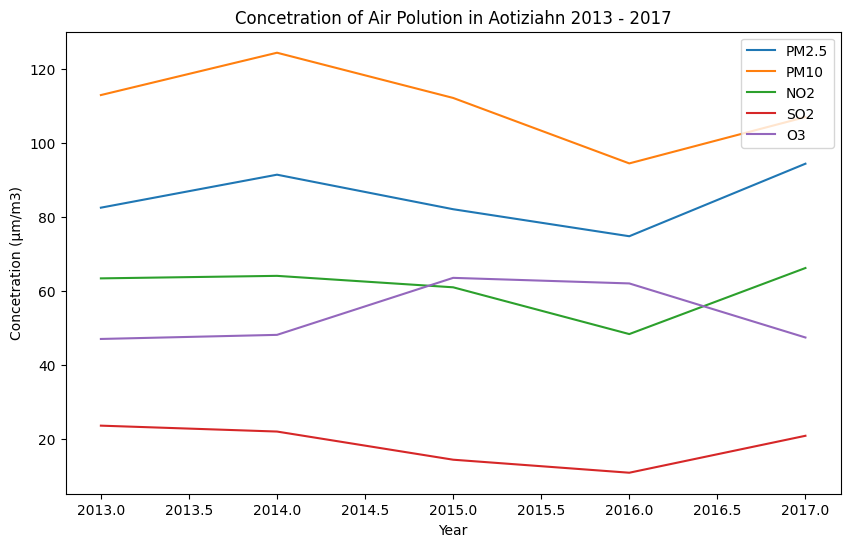

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(groupYear.index, groupYear["PM2.5"], label="PM2.5")
plt.plot(groupYear.index, groupYear["PM10"], label="PM10")
plt.plot(groupYear.index, groupYear["NO2"], label="NO2")
plt.plot(groupYear.index, groupYear["SO2"], label="SO2")
plt.plot(groupYear.index, groupYear["O3"], label="O3")
plt.xlabel("Year")
plt.ylabel("Concetration (µm/m3)")
plt.title("Concetration of Air Polution in Aotiziahn 2013 - 2017")
plt.legend()
plt.show()

Trend kualitas udara di Aotizhongzin terlihat mulai membaik dari tahun 2014 hingga 2016, namun kualitas udara Aotizhongzin mulai memburuk memasuki kuartal 3 2016 hingga 2017.

### Pertanyaan 2: Apakah ada korelasi antara tingkat polusi udara (PM2.5, PM10, SO2, NO2, CO, O3)  dengan variabel meteorologi (suhu, kelembaban, kecepatan angin, dan curah hujan) di Aotizhongzin dari tahun 2013 hingga 2017?

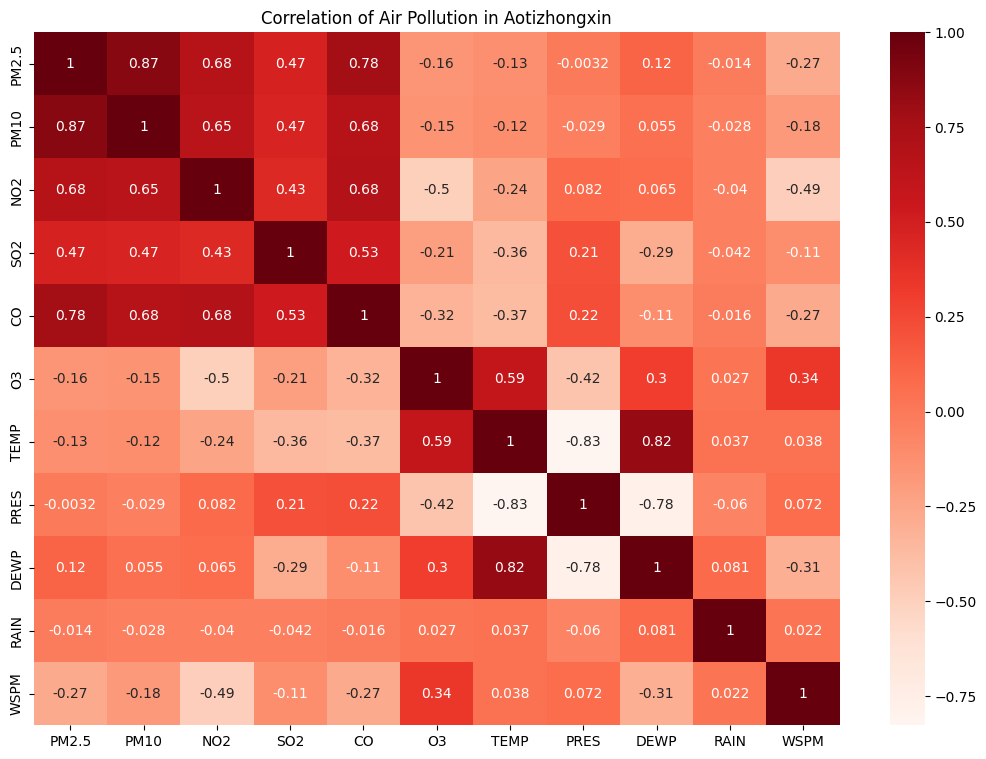

In [17]:
voi = ["PM2.5", "PM10", "NO2", "SO2", "CO", "O3",
       "TEMP", "PRES", "DEWP", "RAIN", "WSPM"]
subset_df = df_imputed[voi]
correlation_matrix = subset_df.corr()

plt.figure(figsize=(13,9))
sns.heatmap(correlation_matrix, cmap='Reds', annot=True)
plt.title('Correlation of Air Pollution in Aotizhongxin')
plt.show()

Dapat terlihat berdasarkan hasil analis bahwa polusi udara (PM2.5, PM10, SO2, NO2, & CO) memiliki Low Negative Correlation dengan variabel meteorologi (Suhu, Tekanan, Titik Embun, Curah Hujan, Kecepatan Angin). Hal ini berbanding terbalik dengan O3, dimana O3 memiliki Korelasi Positif Rendah dengan variabel Titik Embun, Curah Hujan, dan Kecepatan Angin, serta Korelasi Positif Tinggi dengan Suhu.

## Conclusion

1. Bagaimana kualitas udara Aotizhongxin dari tahun ke tahun?
2. Apakah ada korelasi antara tingkat polusi udara (PM2.5, PM10, SO2, NO2, CO, O3)  dengan variabel meteorologi (suhu, kelembaban, kecepatan angin, dan curah hujan) di Aotizhongzin dari tahun 2013 hingga 2017?



---




> 1. Trend kualitas udara di Aotizhongzin terlihat mulai membaik dari tahun 2014 hingga 2016, namun kualitas udara Aotizhongzin mulai memburuk memasuki kuartal 3 2016 hingga 2017.
> 2. Dapat terlihat berdasarkan hasil analis bahwa polusi udara (PM2.5, PM10, SO2, NO2, & CO) memiliki Low Negative Correlation dengan variabel meteorologi (Suhu, Tekanan, Titik Embun, Curah Hujan, Kecepatan Angin). Hal ini berbanding terbalik dengan O3, dimana O3 memiliki Korelasi Positif Rendah dengan variabel Titik Embun, Curah Hujan, dan Kecepatan Angin, serta Korelasi Positif Tinggi dengan Suhu.



